In [25]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [26]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# df = pd.read_csv((
#     "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
#     "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [27]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print('classification_report')
print(classification_report(y_test,y_pred))
print('----------------------------')
print('accuracy_score')
print(accuracy_score(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       505
         1.0       0.76      0.51      0.61       310

    accuracy                           0.75       815
   macro avg       0.75      0.71      0.71       815
weighted avg       0.75      0.75      0.74       815

----------------------------
accuracy_score
0.7521472392638037


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

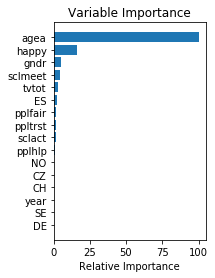

In [29]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [30]:
# X_train['interact'] = X_train['agea'] * X_train['happy']
# X_test['interact'] = X_test['agea'] * X_test['happy']
# X_train

In [31]:
from sklearn.model_selection import ParameterGrid
# param_grid = {'a': [1, 2], 'b': [True, False]}
# list(ParameterGrid(param_grid)) 



# We'll make 500 iterations, use 2-deep trees, and set our loss function.
# params = {'n_estimators': 500,
#           'max_depth': 2,
#           'loss': 'deviance'}


param_grid = {'n_estimators': [100, 500],
          'max_depth': [2,3,4],
          'loss': ['deviance', 'exponential'],
         'subsample': [ 0.9, 1],
         'min_samples_leaf': [2, 3, 4],
         'min_samples_split': [2,3] }

score_max = 0
for (params, index) in zip(list(ParameterGrid(param_grid)), range(len(list(ParameterGrid(param_grid))))) :




    # Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

#     # Accuracy tables.
#     table_train = pd.crosstab(y_train, predict_train, margins=True)
#     table_test = pd.crosstab(y_test, predict_test, margins=True)

#     train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
#     train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

#     test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
#     test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

#     print((
#         'Training set accuracy:\n'
#         'Percent Type I errors: {}\n'
#         'Percent Type II errors: {}\n\n'
#         'Test set accuracy:\n'
#         'Percent Type I errors: {}\n'
#         'Percent Type II errors: {}'
#     ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
#     print("\n")

#     from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#     # clf.fit(X_train, y_train)
#     y_pred=clf.predict(X_test)

#     print('classification_report')
#     print(classification_report(y_test,y_pred))
#     print('----------------------------')

    if accuracy_score(y_test, predict_test) > score_max:
            score_max = accuracy_score(y_test, predict_test)
            para_best = params
    print('no. {} out of {}'.format(index, len(list(ParameterGrid(param_grid)))))
    print('accuracy_score')
    print(accuracy_score(y_test, predict_test))
    print('max score: {}'.format(score_max))
    print(params)
    print('-------------------')
    print("\n")
    
    
        
print("para best: ")
print(para_best)
print("max score")
print(score_max)

no. 0 out of 144
accuracy_score
0.747239263803681
max score: 0.747239263803681
{'loss': 'deviance', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.9}
-------------------


no. 1 out of 144
accuracy_score
0.7411042944785277
max score: 0.747239263803681
{'loss': 'deviance', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1}
-------------------


no. 2 out of 144
accuracy_score
0.7484662576687117
max score: 0.7484662576687117
{'loss': 'deviance', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.9}
-------------------


no. 3 out of 144
accuracy_score
0.750920245398773
max score: 0.750920245398773
{'loss': 'deviance', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 1}
-------------------


no. 4 out of 144
accuracy_score
0.743558282208589
max score: 0.750920245398773
{'loss': 'deviance', 'max_

no. 37 out of 144
accuracy_score
0.7533742331288343
max score: 0.754601226993865
{'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100, 'subsample': 1}
-------------------


no. 38 out of 144
accuracy_score
0.7300613496932515
max score: 0.754601226993865
{'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500, 'subsample': 0.9}
-------------------


no. 39 out of 144
accuracy_score
0.7386503067484662
max score: 0.754601226993865
{'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500, 'subsample': 1}
-------------------


no. 40 out of 144
accuracy_score
0.750920245398773
max score: 0.754601226993865
{'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.9}
-------------------


no. 41 out of 144
accuracy_score
0.7484662576687117
max score: 0.754601226993865
{'loss': 'deviance',

no. 74 out of 144
accuracy_score
0.754601226993865
max score: 0.7558282208588957
{'loss': 'exponential', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.9}
-------------------


no. 75 out of 144
accuracy_score
0.750920245398773
max score: 0.7558282208588957
{'loss': 'exponential', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 1}
-------------------


no. 76 out of 144
accuracy_score
0.7361963190184049
max score: 0.7558282208588957
{'loss': 'exponential', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100, 'subsample': 0.9}
-------------------


no. 77 out of 144
accuracy_score
0.7398773006134969
max score: 0.7558282208588957
{'loss': 'exponential', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100, 'subsample': 1}
-------------------


no. 78 out of 144
accuracy_score
0.7447852760736197
max score: 0.7558282208588957
{'lo

no. 110 out of 144
accuracy_score
0.7349693251533742
max score: 0.7558282208588957
{'loss': 'exponential', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500, 'subsample': 0.9}
-------------------


no. 111 out of 144
accuracy_score
0.7386503067484662
max score: 0.7558282208588957
{'loss': 'exponential', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500, 'subsample': 1}
-------------------


no. 112 out of 144
accuracy_score
0.7484662576687117
max score: 0.7558282208588957
{'loss': 'exponential', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.9}
-------------------


no. 113 out of 144
accuracy_score
0.7484662576687117
max score: 0.7558282208588957
{'loss': 'exponential', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1}
-------------------


no. 114 out of 144
accuracy_score
0.7337423312883435
max score: 0.75582822085889

In [32]:
# check type I and type II error
clf = ensemble.GradientBoostingClassifier(**para_best)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.03955264593562466
Percent Type II errors: 0.17171303873431534

Test set accuracy:
Percent Type I errors: 0.05766871165644172
Percent Type II errors: 0.18282208588957055


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

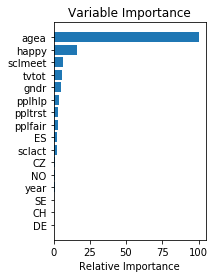

In [33]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## sumary
- By using grid search approach, we found the "best" hyper parameter for gradient boosting model.
- From the result, we can see that the accuracy has improved for 0.007 , i.e. from 0.7521 to 0.7595. The improved margin is not very large. That's why grid search method is handy, otherwise we might have missed the better hyper-parameter settings.
- Accordingly, type I and type II error has decreased as shown below:
original:
Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191

improved:
Training set accuracy:
Percent Type I errors: 0.03955264593562466
Percent Type II errors: 0.17171303873431534

Test set accuracy:
Percent Type I errors: 0.05766871165644172
Percent Type II errors: 0.18282208588957055

